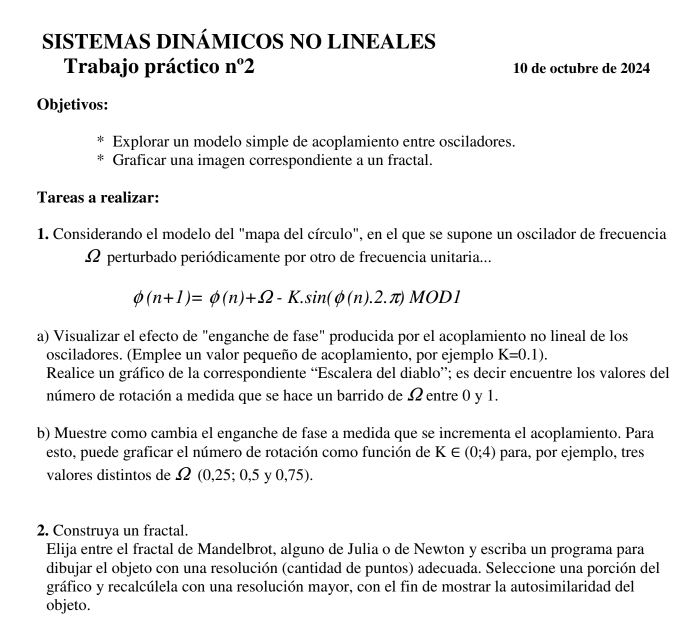

##############################################################################################################################################################################################

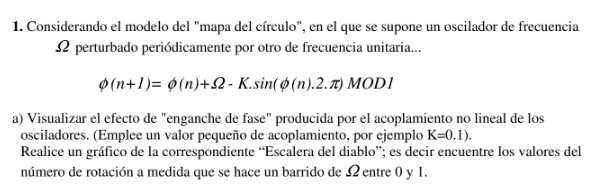

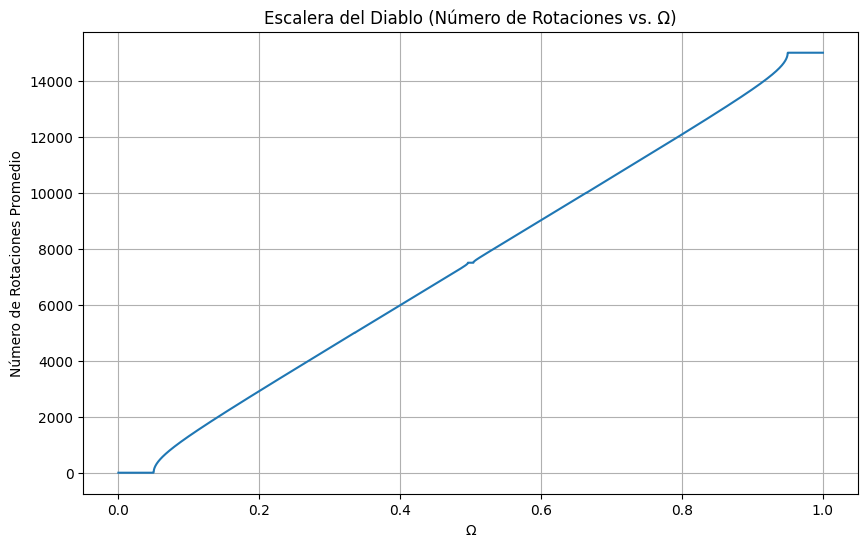

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
K = 0.05  # Acoplamiento
n_iter = 10000  # Iteraciones para que el sistema alcance estado estacionario
n_rotations = 10000  # Iteraciones adicionales para contar rotaciones
omegas = np.linspace(0, 1, 4000)  # Barrido de Ω entre 0 y 1

def map_circle(omega, K, n_iter, n_rotations):
    """Simula el mapa del círculo para un Ω dado y cuenta rotaciones."""
    phi = 0  # Condición inicial
    total_rotations = 0  # Acumulador de rotaciones

    # Fase inicial para estabilizar
    for _ in range(n_iter):
        phi = (phi + omega - K * np.sin(2 * np.pi * phi))

    # Contar rotaciones después de estabilización
    for _ in range(n_rotations):
        phi = (phi + omega - K * np.sin(2 * np.pi * phi))
        total_rotations += phi

    # Devolvemos el número promedio de rotaciones
    return total_rotations / n_rotations

# Computar la escalera del diablo
rotation_numbers = [map_circle(omega, K, n_iter, n_rotations) for omega in omegas]

# Graficar la escalera del diablo
plt.figure(figsize=(10, 6))
plt.plot(omegas, rotation_numbers, lw=1.5)
plt.title("Escalera del Diablo (Número de Rotaciones vs. Ω)")
plt.xlabel("Ω")
plt.ylabel("Número de Rotaciones Promedio")
plt.grid(True)
plt.show()


##########################################################################################################################################################################################

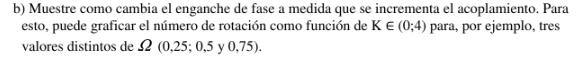

Codigo para Ω=0,25

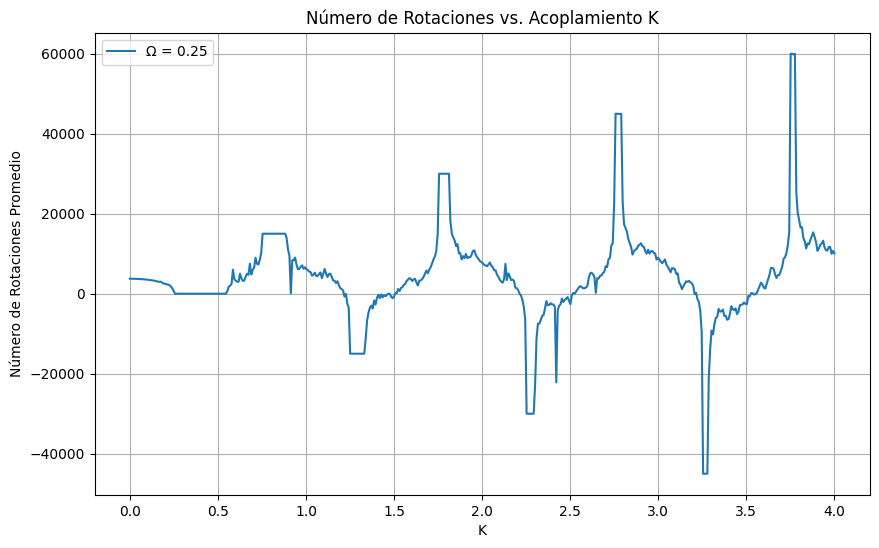

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
K_values = np.linspace(0, 4, 500)  # Barrido de K entre 0 y 4
n_iter = 10000  # Iteraciones para estabilizar
n_rotations = 10000  # Iteraciones par0a contar rotaciones
omegas = [0.25]  # Valores fijos de Ω

def map_circle(omega, K, n_iter, n_rotations):
    """Simula el mapa del círculo y calcula el número de rotaciones promedio."""
    phi = 0  # Condición inicial
    total_rotations = 0

    # Estabilizar el sistema
    for _ in range(n_iter):
        phi = (phi + omega - K * np.sin(2 * np.pi * phi))

    # Contar rotaciones promedio
    for _ in range(n_rotations):
        phi = (phi + omega - K * np.sin(2 * np.pi * phi))
        total_rotations += phi

    return total_rotations / n_rotations

# Graficar el número de rotaciones como función de K para cada Ω
plt.figure(figsize=(10, 6))

for omega in omegas:
    rotation_numbers = [map_circle(omega, K, n_iter, n_rotations) for K in K_values]
    plt.plot(K_values, rotation_numbers, label=f'Ω = {omega}', lw=1.5)

# Configuración de la gráfica
plt.title("Número de Rotaciones vs. Acoplamiento K")
plt.xlabel("K")
plt.ylabel("Número de Rotaciones Promedio")
plt.legend()
plt.grid(True)
plt.show()


Codigo para distintos Ω

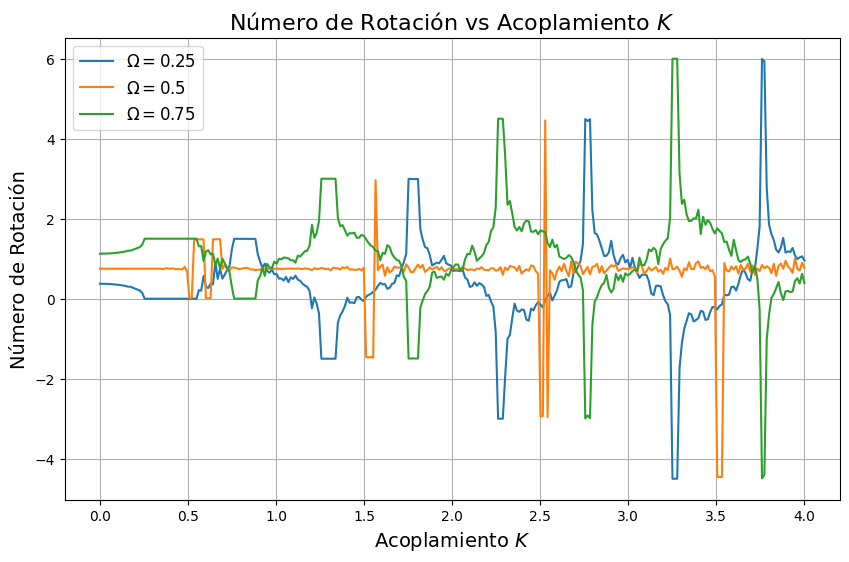

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def circle_map(phi, Omega, K):
    """Mapa del círculo: Calcula phi(n+1) con la ecuación dada."""
    return (phi + Omega - K * np.sin(2 * np.pi * phi))

def rotation_number(Omega, K, iterations=1000, discard=500):
    """Calcula el número de rotación para un valor dado de Omega y K."""
    phi = 0.0  # Condición inicial
    total_phase = 0.0

    # Descartamos las primeras iteraciones para evitar efectos transitorios
    for _ in range(discard):
        phi = circle_map(phi, Omega, K)

    # Medimos el número de rotación acumulado en las iteraciones restantes
    for _ in range(iterations):
        phi = circle_map(phi, Omega, K)
        total_phase += phi

    # Retornamos el número de rotación promedio
    return total_phase / iterations

# Configuración de parámetros
Ks = np.linspace(0, 4, 300)  # Barrido de K entre 0 y 4
Omegas = [0.25, 0.5, 0.75]   # Valores de Omega seleccionados

# Gráficos del número de rotación para cada Omega
plt.figure(figsize=(10, 6))
for Omega in Omegas:
    rotation_numbers = [rotation_number(Omega, K) for K in Ks]
    plt.plot(Ks, rotation_numbers, label=f'$\Omega = {Omega}$')

# Configuración de la gráfica
plt.xlabel('Acoplamiento $K$', fontsize=14)
plt.ylabel('Número de Rotación', fontsize=14)
plt.title('Número de Rotación vs Acoplamiento $K$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



###########################################################################################################################################################################################################################################

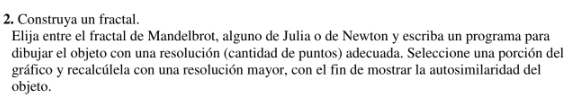

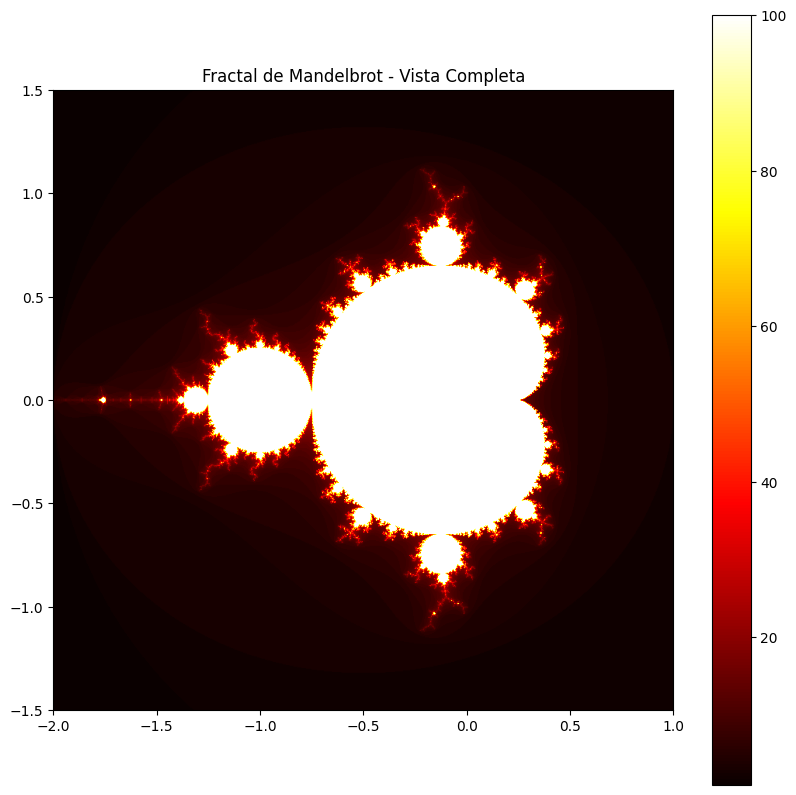

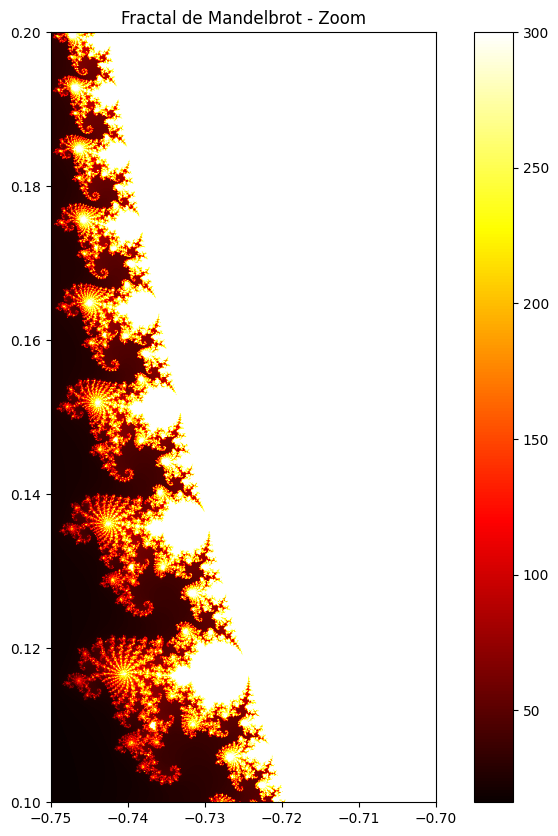

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    """Devuelve el número de iteraciones para determinar si c está en el conjunto."""
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n  # Sale del conjunto
        z = z**2 + c
    return max_iter  # Está dentro del conjunto

def generate_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter):
    """Genera la imagen del fractal de Mandelbrot."""
    re = np.linspace(xmin, xmax, width)
    im = np.linspace(ymin, ymax, height)
    fractal = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            c = complex(re[j], im[i])
            fractal[i, j] = mandelbrot(c, max_iter)

    return fractal

# Parámetros iniciales del fractal completo
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
width, height = 800, 800
max_iter = 100

# Generar y mostrar el fractal completo
fractal = generate_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter)
plt.figure(figsize=(10, 10))
plt.imshow(fractal, cmap='hot', extent=(xmin, xmax, ymin, ymax))
plt.colorbar()
plt.title("Fractal de Mandelbrot - Vista Completa")
plt.show()

# Parámetros para hacer zoom en una región específica
xmin_zoom, xmax_zoom, ymin_zoom, ymax_zoom = -0.75, -0.7, 0.1, 0.2
width_zoom, height_zoom = 1000, 1000  # Mayor resolución
max_iter_zoom = 300  # Aumentamos las iteraciones

# Generar y mostrar el fractal con zoom
fractal_zoom = generate_mandelbrot(xmin_zoom, xmax_zoom, ymin_zoom, ymax_zoom, width_zoom, height_zoom, max_iter_zoom)
plt.figure(figsize=(10, 10))
plt.imshow(fractal_zoom, cmap='hot', extent=(xmin_zoom, xmax_zoom, ymin_zoom, ymax_zoom))
plt.colorbar()
plt.title("Fractal de Mandelbrot - Zoom")
plt.show()
